In [1]:
import numpy as np, pandas as pd, sklearn
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the text file
file = open("yelp/train.txt", "r", encoding = "utf8")
file_data = file.read()
lines = file_data.splitlines()
file.close()

data1 = []
keys1 = []
#only use senteces that contain the keyword
keyword = "pizza"
for s in lines:
    if keyword in s:
        data1.append(s)
        keys1.append(keyword)

#appending a random weird sentence to see if it pops to the top of the sentence rankings        
data1.append("Colorless green ideas sleep furiously .")
keys1.append(keyword)
#data = formatting(data)

#generates embedding for the sentences
emb = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')

In [3]:
#read the text file
file = open("yelp/train.txt", "r", encoding = "utf8")
file_data = file.read()
lines = file_data.splitlines()
file.close()

data2 = []
keys2 = []
#only use senteces that contain the keyword
keyword = "staff"
for s in lines:
    if keyword in s:
        data2.append(s)
        keys2.append(keyword)
print(len(data2))

3528


In [4]:
data = []
for i in data1:
    data.append(i)
keys = []
for i in keys1:
    keys.append(i)
print(len(keys))
for i in data2:
    if i in data1:
        print(i, ": ", data2.index(i))
        keys.remove(keys[data1.index(i)])
        keys.insert(data1.index(i), "pizza, staff")
        data2.remove(i)

2146
the staff are great people and the quality of the pizza is amazing . :  297
the staff there is always friendly , and the pizza is delicious . :  834
staff are great and the pizza is always yummy ! :  940
pizza really good , owner makes incredible homemade desserts , friendly staff . :  1229
with no interaction with the pizza hut staff . :  2198
staff was upbeat and nice , pizza buffet was sparse and pizza looked old . :  2906
sorry , pizza pit staff . :  3329


In [5]:
for i in data2:
    data.append(i)
for i in range(len(data)-len(keys)):
    keys.append("staff")

In [6]:
print(len(data))

5667


In [7]:
embed = emb.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/178 [00:00<?, ?it/s]

In [8]:
def dim_reduce_PCA(num_comps, print_data=False, return_model=False):
    pca_standardized_embed = StandardScaler().fit_transform(embed) #added because this is used in paper 
                                                               #(they say that PCA assumes a Gaussian Distribution 
                                                               #and the features must be normalized)
    pca = PCA(n_components=num_comps, random_state = 2023)
    model = pca.fit(pca_standardized_embed)
    embed_red_pca = model.transform(pca_standardized_embed)
    if print_data:
        orig = pd.DataFrame(pca_standardized_embed)
        reduced = pd.DataFrame(embed_red_pca)
        print("original: \n")
        print(orig)
        print("\n dimensionally reduced: \n")
        print(reduced)
    if return_model:
        return [embed_red_pca, model]
    return embed_red_pca


In [9]:
def num_bins_Freedman_Diaconis(data):
    num_bins = []
    for i in range(data.shape[1]):
        iqr = stats.iqr(data[:,i])
        h = 2 * iqr * (len(data[:,i]) ** (-1/3))
        num_bins.append(ceil((np.max(data[:,i])-np.min(data[:,i]))/h))
    return num_bins

In [10]:
def histogram(data, bins, frequency = False):
    all_hist = []
    all_bins = []
    for i in range(data.shape[1]):
        hist, bin_edges = np.histogram(data[:,i], bins = bins[i], density = not frequency)
        all_hist.append(hist)
        all_bins.append(bin_edges)
    return all_hist, all_bins

In [11]:
def find_bin(bins, value):
    if value == bins[0]:
        return 0
    i = 1
    while value > bins[i]:
        i+=1
    return i-1

In [12]:
def probability(histograms, bins, data):
    probs = []
    for col in range(data.shape[1]):
        col_prob = []
        width = np.diff(np.array(bins[col]))[0]
        for row in range(data.shape[0]):
            idx = find_bin(bins[col], data[row][col])
            prob = histograms[col][idx] * width
            col_prob.append(prob)
        probs.append(col_prob)
    return np.array(probs).T

In [13]:
def sentence_surprisals(probs):
    surprisals = []
    for i in range(probs.shape[0]):
        surprisals.append(-1*sum(np.log2(probs[i])))
    return np.array(surprisals)

<Axes: title={'center': 'PCA plot'}, xlabel='0', ylabel='1'>

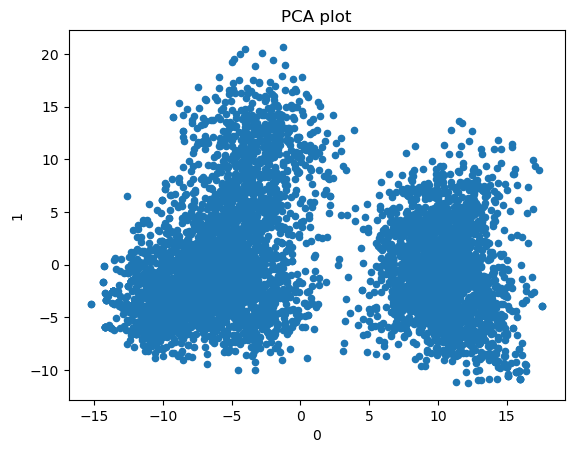

In [14]:
embed_red_pca, pca_model= dim_reduce_PCA(75, print_data = False, return_model=True)
df_pca = pd.DataFrame(embed_red_pca)
df_pca.plot(0,1, kind="scatter", title = "PCA plot")

In [15]:
print(keys)

['pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 

In [16]:
pd.DataFrame.plot?

[Text(0.5, 1.0, 'PCA Plot of dataset containing keywords pizza and staff')]

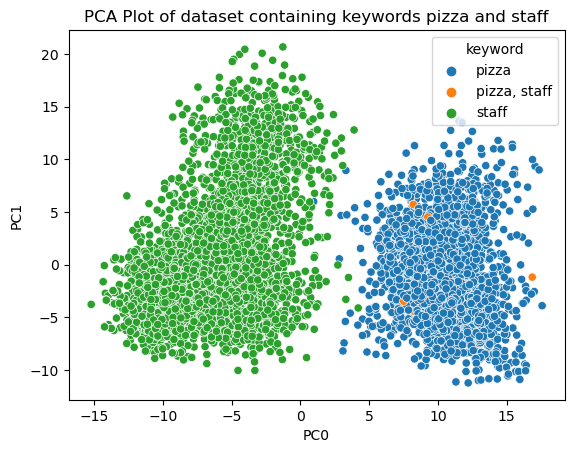

In [18]:
df_pca = pd.DataFrame(embed_red_pca)
df_pca.columns = ["PC" + str(i) for i in df_pca.columns]
df_pca["keyword"] = keys
sns.scatterplot(data=df_pca, x='PC0', y='PC1',hue="keyword").set(title="PCA Plot of dataset containing keywords pizza and staff")